# Libraries used
PV --> Running 3.10.10
Running Kernel3.9.13 base anaconda

#perform al pip installs in one go comment out if already installed
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scipy
!pip install statsmodels
!pip install plotly
!pip install cufflinks
!pip install squarify
!pip install yellowbrick
!pip install lazypredict
!pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings



#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler


from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

# Functions


In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# 2. Data Collection and Understanding 

## Network file

The network.csv file contains a static picture of the gas pipeline network. Every row corresponds to a pipe and has a unique PipeId identifier. The table has 1.446.529 pipes. 

The columns describe relevant features of each pipe. The complete list is: 

PipeId - unique identifier for the pipe 

Province - Spanish province where the pipe is located 

Town - Town or city where the pipe is located 

YearBuilt - Year in which the pipe was built and installed 

Material - Material in which the pipe is built 

GasType - Type of gas that runs through the pipe 

Diameter - diameter of the pipe 

Length - Length of the pipe 

Pressure - Pressure of the gas that runs through the pipe (bar) 

NumConnections - Number of connections (external). 

NumConnectionsUnder - Number of connections (internal and buried) 

BoolBridle  - Whether the pipe is bridled (True) or welded (False) 

## Inspection file

MaintenanceId - unique identifier for the inspection operation 

InspectionYear - year in which the inspection took place 

InspectionDate - date in which the inspection took place 

MonthsLastRev - number of months elapsed since the last previous inspection. 

Severity - Severity of the damage found (1: most severe, 3: least severe) 

Incidence - Boolean whether an incident was found on the revision (1) or not (0). 

# Loading datasets

In [5]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data")

# Loading inspection data
df_inspection = pd.read_csv('inspections.csv')

# Loading network data
df_network = pd.read_csv('network.csv')


#point to the folder where the data is stored For Juan
os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\Notebook")

#### Loading inspection data
df_inspection = pd.read_csv('inspections.csv')

#### Loading network data
df_network = pd.read_csv('network.csv')

# Pandas EDA on raw files

In [6]:
quick_check(df_inspection)


First 5 rows %s

      PipeId MaintenanceId  InspectionYear InspectionDate  MonthsLastRev  \
0  189311802  ZRV-00001972            2010     2010-10-01             24   
1  188889914  ZRV-00001406            2010     2010-10-01             22   

   Severity  Incidence  
0         4          0  
1         4          0  
Dataframe shape %s

(6345344, 7)
Dataframe describe categorical %s

       MaintenanceId InspectionDate
count        6345344        6345344
unique          4179           3565
top     ZRV-00002121     2014-05-05
freq           21773           5832
Dataframe null values %s

PipeId            0
MaintenanceId     0
InspectionYear    0
InspectionDate    0
MonthsLastRev     0
Severity          0
Incidence         0
dtype: int64
Dataframe value counts %s

PipeId     MaintenanceId  InspectionYear  InspectionDate  MonthsLastRev  Severity  Incidence
489616     ZRV-00003385   2013            2013-05-08      16             4         0            1
256852211  ZRV-00002129   2016    

The function shows we have 6345344 rows for the inspections, among each 4179 appear to be unique and the most repeated one is ZRV-00002121 on 2014-05-05


In [7]:
#searching for MaintenanceId ZRV-00002121 in df_inspection
df_inspection[df_inspection['MaintenanceId'] == 'ZRV-00002121']

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence
622563,188821075,ZRV-00002121,2012,2011-12-28,24,4,0
622571,191340447,ZRV-00002121,2012,2011-12-28,24,4,0
622572,191340427,ZRV-00002121,2012,2011-12-28,24,4,0
622574,191340421,ZRV-00002121,2012,2011-12-28,24,4,0
622575,188802580,ZRV-00002121,2012,2011-12-28,24,4,0
...,...,...,...,...,...,...,...
5737006,450197378,ZRV-00002121,2020,2020-01-29,24,4,0
5737013,358229516,ZRV-00002121,2020,2020-01-29,24,4,0
5737179,351671916,ZRV-00002121,2020,2020-01-29,24,4,0
5737289,351671518,ZRV-00002121,2020,2020-01-29,24,4,0


In [8]:
df_inspection[df_inspection['MaintenanceId'] == 'ZRV-00002121'].shape

(21773, 7)

<AxesSubplot:xlabel='InspectionYear'>

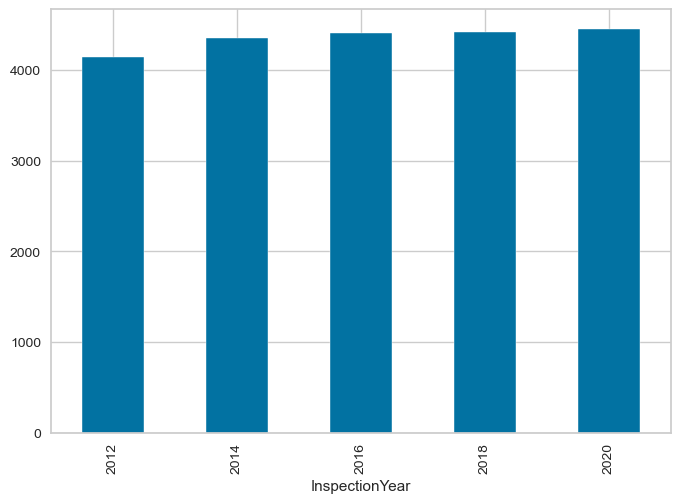

In [9]:
#plotting the distribution of MaintenanceId accross the years for ZRV-00002121 in df_inspection
df_inspection[df_inspection['MaintenanceId'] == 'ZRV-00002121'].groupby('InspectionYear')['MaintenanceId'].count().plot(kind='bar')

<AxesSubplot:xlabel='InspectionYear'>

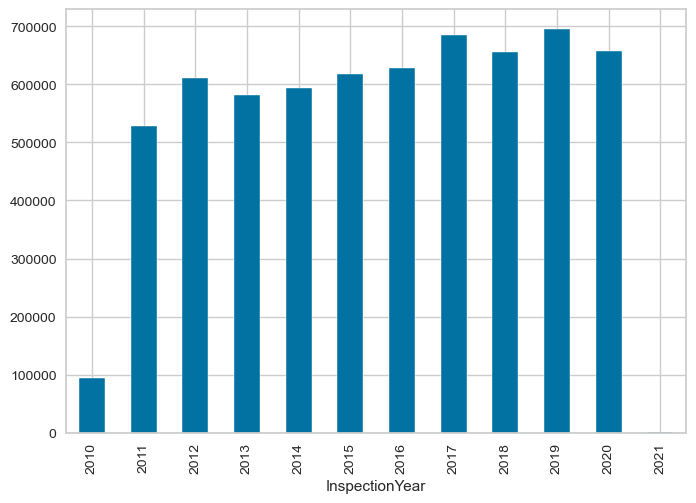

In [10]:
#plotting the distribution of MaintenanceId accross the years
df_inspection.groupby('InspectionYear')['MaintenanceId'].count().plot(kind='bar')

Seems like not so many inspections were carried in 2010, we shall decide on whether to keep this dimension or not

In [11]:
stats(df_inspection)

Dataframe correlation %s

                PipeId  InspectionYear  MonthsLastRev  Severity  Incidence
PipeId            1.00           -0.12           0.05      0.02      -0.02
InspectionYear   -0.12            1.00           0.12      0.00      -0.00
MonthsLastRev     0.05            0.12           1.00      0.01      -0.01
Severity          0.02            0.00           0.01      1.00      -0.90
Incidence        -0.02           -0.00          -0.01     -0.90       1.00
Dataframe covariance %s

                             PipeId  InspectionYear  MonthsLastRev  Severity  \
PipeId         12943583115885750.00    -40999914.58    27545538.86 129283.54   
InspectionYear         -40999914.58            8.46           1.70      0.00   
MonthsLastRev           27545538.86            1.70          24.62      0.00   
Severity                  129283.54            0.00           0.00      0.00   
Incidence                -107454.24           -0.00          -0.00     -0.00   

                In

 A positive kurtosis in a dataset implies that the data is more heavily concentrated around the mean than a normal distribution. This means that there are more outliers in the dataset and that the tails of the distribution are longer and fatter than a normal distribution. Months last revision is to be examined on this basis

<AxesSubplot:>

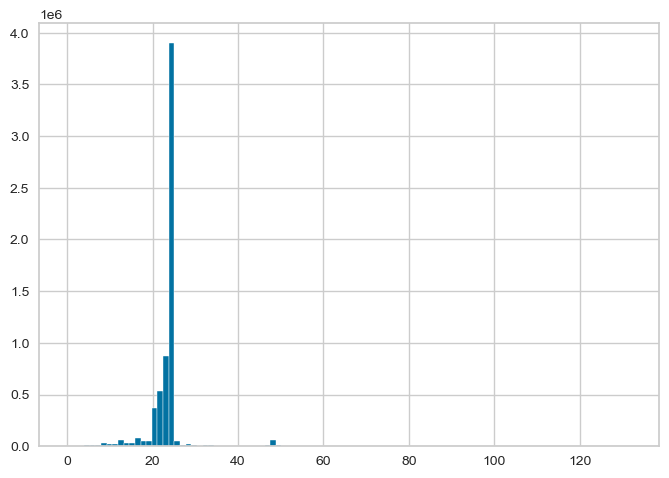

In [12]:
#plot histogram with many bins of MonthsLastRev in  df_inspection
df_inspection['MonthsLastRev'].hist(bins=100)

The shape of the histogram reveals the most frequent inspections take place every 2 years or 24 months with some outliers hence affecting the normal distribution

In [13]:
quick_check(df_network)

First 5 rows %s

   PipeId     Province                   Town  YearBuilt Material  \
0  489616  Ciudad Real  Torralba de Calatrava       2012       PE   
1  489645  Ciudad Real  Torralba de Calatrava       2012       PE   

       GasType  Diameter  Length  Pressure  NumConnections  \
0  Gas natural     63.00    7.79      0.40               0   
1  Gas natural     90.00    2.08      0.40               0   

   NumConnectionsUnder  BoolBridle  
0                    0       False  
1                    0       False  
Dataframe shape %s

(1446539, 12)
Dataframe describe categorical %s

         Province     Town Material      GasType
count     1446539  1446539  1446539      1446539
unique         38     1972       11            2
top     Barcelona   Madrid       PE  Gas natural
freq       389307    76666  1242845      1388397
Dataframe null values %s

PipeId                 0
Province               0
Town                   0
YearBuilt              0
Material               0
GasType     

In the network file we find 1446539 rows corresponding to all pipes, this is the master file for pipes.
We find the most frequent Town is Madrid but the most frequent province is Barcelona. 
There are a total of 1972 Spanish towns in this dataset and 38 provinces
We are missing the Basque Country, Ceuta, Melilla, the Canary Islands and Balearic Islands.



<AxesSubplot:xlabel='Town'>

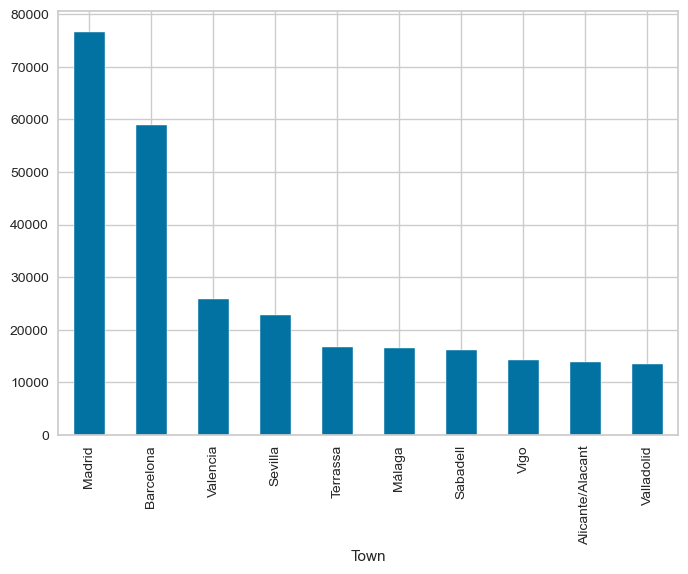

In [14]:
#plot a bar plot with the number of pipes per Town focusing in Madrid and Barcelona  in df_network
df_network.groupby('Town')['PipeId'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:ylabel='PipeId'>

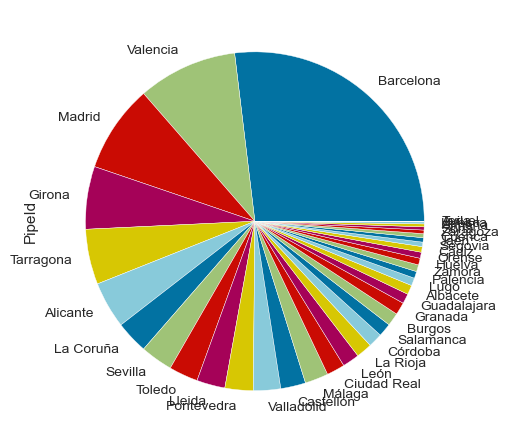

In [15]:
#plot a pie chart with the number of pipes per Province in df_network 
df_network.groupby('Province')['PipeId'].count().sort_values(ascending=False).plot(kind='pie')


In [16]:
stats(df_network)

Dataframe correlation %s

                     PipeId  YearBuilt  Diameter  Length  Pressure  \
PipeId                 1.00      -0.05      0.13   -0.01      0.04   
YearBuilt             -0.05       1.00     -0.16    0.03      0.05   
Diameter               0.13      -0.16      1.00    0.07      0.19   
Length                -0.01       0.03      0.07    1.00      0.11   
Pressure               0.04       0.05      0.19    0.11      1.00   
NumConnections        -0.05      -0.03     -0.11    0.31     -0.10   
NumConnectionsUnder   -0.01       0.01     -0.01    0.02     -0.00   
BoolBridle            -0.09      -0.18      0.09   -0.02     -0.07   

                     NumConnections  NumConnectionsUnder  BoolBridle  
PipeId                        -0.05                -0.01       -0.09  
YearBuilt                     -0.03                 0.01       -0.18  
Diameter                      -0.11                -0.01        0.09  
Length                         0.31                 0.02   

# Merging inspections and network

In [17]:
#join Inspection and network datasets on PipeId to create our TRAIN dataset
train = pd.merge(df_inspection, df_network, on='PipeId', how='right')

This merge is done on the right to enrich the inspections df, adding to each pipe_id all its maintenance history

In [18]:
train.shape

(6364029, 18)

In [19]:
df_inspection.shape

(6345344, 7)

There are 18K null values that do not have information in the df_network so our TRAIN data set is now bigger and we will need to deal with the nulls further down.

In [20]:
#count null values in train dataset
train.isnull().sum()


PipeId                     0
MaintenanceId          18685
InspectionYear         18685
InspectionDate         18685
MonthsLastRev          18685
Severity               18685
Incidence              18685
Province                   0
Town                       0
YearBuilt                  0
Material                   0
GasType                    0
Diameter                   0
Length                     0
Pressure                   0
NumConnections             0
NumConnectionsUnder        0
BoolBridle                 0
dtype: int64

In [21]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data")

# Loading inspection data
df_sample = pd.read_csv('sample_submission.csv')

In [22]:
#point to the folder where the data is stored for Juan
#os.chdir(r"C:\Users\JuanHorrillo\OneDrive - IE Students\Documents\Masters\Sustainability\Notebook")

# Loading inspection data
#df_sample = pd.read_csv('sample_submission.csv')

In [23]:
df_sample.shape

(909733, 2)

In [24]:
df_sample.head()

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0


In [25]:
#count the Incidence values in test dataset
df_sample['Incidence'].value_counts()



0    907964
1      1769
Name: Incidence, dtype: int64

Test data set is also unbalanced 

# Adapting df_sample to be the same

Creating the TEST df which will be used to test our model.  This is made of the sample submission with the columns from the network

In [26]:
#create a dataframe with the unique PipeId from df_sample and a dataframe with the PipeId from df_network 
sample_unique = df_sample['PipeId'].unique()
network_unique = df_network['PipeId'].unique()
#check if all the values in sample_unique are in network_unique
np.all(np.isin(sample_unique, network_unique))

True

All the PipeId on the df_sample have a PipeId on the network

In [27]:
#join both datasets on PipeId
test = pd.merge(df_network , df_sample, on='PipeId', how='right')

In [28]:
test.shape

(909733, 13)

In [29]:
test.head()

,PipeId,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,Incidence
0,446859944,Valencia,Alginet,2012,PE,Gas natural,110.00,44.29,0.15,0,0,False,0
1,428124500,Valencia,Alginet,2012,PE,Gas natural,160.00,110.72,0.15,2,0,False,0
2,438428871,Valencia,Alginet,2012,PE,Gas natural,110.00,13.57,0.15,0,0,False,0
3,429034569,Valencia,Alginet,2012,PE,Gas natural,110.00,327.69,0.15,3,0,False,0
4,411184477,Valencia,Alginet,2007,PE,Gas natural,200.00,932.76,0.15,0,0,False,0


In [30]:
df_sample.head()

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0


In [31]:
#Check for null values in test dataset
test_null = test.isnull().sum()    
test_null.head()

PipeId       0
Province     0
Town         0
YearBuilt    0
Material     0
dtype: int64

No null Values in TEST data set

In [32]:
#creating a subset for altering the dataset after initial EDA
train_copy = train.copy()

In [33]:
#RAM usage of train_copy
train_copy.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6364029 entries, 0 to 6364028
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PipeId               int64  
 1   MaintenanceId        object 
 2   InspectionYear       float64
 3   InspectionDate       object 
 4   MonthsLastRev        float64
 5   Severity             float64
 6   Incidence            float64
 7   Province             object 
 8   Town                 object 
 9   YearBuilt            int64  
 10  Material             object 
 11  GasType              object 
 12  Diameter             float64
 13  Length               float64
 14  Pressure             float64
 15  NumConnections       int64  
 16  NumConnectionsUnder  int64  
 17  BoolBridle           bool   
dtypes: bool(1), float64(7), int64(4), object(6)
memory usage: 3.0 GB


In [34]:
#deleting old df to save RAM memory
del train
del df_inspection
del df_network
del sample_unique
del network_unique
del test


In [35]:
#find the columns with null values in train_copy
train_copy.isnull().sum()

PipeId                     0
MaintenanceId          18685
InspectionYear         18685
InspectionDate         18685
MonthsLastRev          18685
Severity               18685
Incidence              18685
Province                   0
Town                       0
YearBuilt                  0
Material                   0
GasType                    0
Diameter                   0
Length                     0
Pressure                   0
NumConnections             0
NumConnectionsUnder        0
BoolBridle                 0
dtype: int64

# Querying the combined df in search of non-coherent data

In [36]:
#show me a head of train_copy with YearBuilt == 2020
train_copy[train_copy['YearBuilt'] > 2020].head()

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
64887,185802404,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Puigcerda,2021,PN,Gas natural,110.00,12.01,0.15,1,0,True
64889,188243116,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Puigcerda,2021,PN,Gas natural,90.00,11.82,0.15,1,0,True
70787,185839446,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Girona,2021,PN,Gas natural,110.00,5.10,0.03,1,0,True
70788,186392655,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Girona,2021,PN,Gas natural,63.00,4.51,0.03,1,0,True
70790,186441076,NaN,NaN,NaN,NaN,NaN,NaN,Girona,Girona,2021,PN,Gas natural,63.00,0.29,0.03,0,0,True


In [37]:
#count the PipeID that have YearBuilt equal to 2021 and InspectionYear equal to NaN
train_copy[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'].isnull())].shape



(2026, 18)

In [38]:


train_copy[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'].isnull())].to_csv('train_copy_2020.csv')

There are 2026 pipes that were built after 2020 in the train data set, these came from the network data set and will be considered new pipes that do not have inspection data yet. We will assume that the inspection year for those was the year of installation (you inspect them when you install them). 

This is to be done in the submission file. To know which pipes to add 2020, we export a subset file containing this information. After this we delete these rows

In [39]:
# dropping the rows with YearBuilt > 2020 and InspectionYear == NaN
train_copy = train_copy.drop(train_copy[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'].isnull())].index)

#count the PipeID that have YearBuilt equal to 2021 and InspectionYear equal to NaN
train_copy[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'].isnull())].shape

(0, 18)

In [40]:
#show me nulls for InspectionYear for every year in train_copy
train_copy.groupby('InspectionYear')['InspectionYear'].count()

InspectionYear
2010.00     93518
2011.00    528113
2012.00    611594
2013.00    581559
2014.00    593223
2015.00    617187
2016.00    627667
2017.00    684715
2018.00    654861
2019.00    694584
2020.00    656878
2021.00      1445
Name: InspectionYear, dtype: int64

In [41]:
#show me the YearBuilt values for the null vales in InspectionYear
train_copy[train_copy['InspectionYear'].isnull()]['YearBuilt'].value_counts()


2020    3290
2019    2654
2016    1144
2015     873
2018     855
2017     806
2002     533
1998     343
2007     341
2008     339
2001     339
2005     338
2006     338
2004     316
2014     311
2003     295
2009     293
2012     250
2000     248
1999     229
2013     222
1997     207
1996     205
2010     175
1995     173
2011     168
1993     149
1994     126
1992     110
1950     105
1987     101
1990      92
1991      88
1988      86
1989      80
1986      63
1901      46
1975      35
1984      34
1985      33
1982      27
1983      26
1974      25
1977      21
1978      19
1976      13
1963      13
1979      11
1973      11
1972      10
1981      10
1980      10
1968       9
1970       8
1971       7
1969       2
1965       2
1966       1
1967       1
Name: YearBuilt, dtype: int64

There are very old pipes in this dataframe. We will deal with them as outliers later in the notebook.

Last, we remove the null values for all those pipes that appear in network but not in inspections

In [42]:
#remove from train_copy the rows where InspectionYear is equal to NaN and yearBuilt is not null
train_copy = train_copy[~((train_copy['InspectionYear'].isnull()) & (train_copy['YearBuilt'].notnull()))]

We do not have info for these pipes so I will remove them all as it is impossible to find out the year built

In [43]:
train_copy.isnull().sum()

PipeId                 0
MaintenanceId          0
InspectionYear         0
InspectionDate         0
MonthsLastRev          0
Severity               0
Incidence              0
Province               0
Town                   0
YearBuilt              0
Material               0
GasType                0
Diameter               0
Length                 0
Pressure               0
NumConnections         0
NumConnectionsUnder    0
BoolBridle             0
dtype: int64

In [44]:
#Count of pipes with YearBuilt higher than InspectionYear 
train_copy[(train_copy['YearBuilt'] > train_copy['InspectionYear'])].shape

#show a head of this query
train_copy[(train_copy['YearBuilt'] > train_copy['InspectionYear'])].head(5)



(7672, 18)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
6426,4189344,ZRV-00003409,2014.00,2014-05-13,72.00,4.00,0.00,Córdoba,Lucena,2019,PE,Gas natural,90.00,1.07,0.15,0,0,False
6428,4189348,ZRV-00003409,2014.00,2014-05-13,72.00,4.00,0.00,Córdoba,Lucena,2019,PE,Gas natural,90.00,195.36,0.15,0,0,False
6430,4189349,ZRV-00003409,2014.00,2014-05-13,72.00,4.00,0.00,Córdoba,Lucena,2019,PE,Gas natural,90.00,8.47,0.15,1,0,False
7468,307145056,ZRV-00003409,2012.00,2012-05-16,24.00,4.00,0.00,Córdoba,Lucena,2018,PE,Gas natural,90.00,9.74,0.15,0,0,False
7469,307145056,ZRV-00003409,2014.00,2014-05-09,24.00,4.00,0.00,Córdoba,Lucena,2018,PE,Gas natural,90.00,9.74,0.15,0,0,False


There seems to be an inconsistency with these pipes as these have been inspected before they were built!  We delete these as well


In [45]:
#drop the rows where YearBuilt is higher than InspectionYear
# train_copy = train_copy.drop(train_copy[(train_copy['YearBuilt'] > train_copy['InspectionYear'])].index)
#for rows where YearBuilt is higher than InspectionYear, replace YearBuilt with InspectionYear - 2
train_copy.loc[(train_copy['YearBuilt'] > train_copy['InspectionYear']), 'YearBuilt'] = train_copy['InspectionYear'] - 2
#If Yearbuilt is smaller than 1970, set it to 1970
train_copy.loc[(train_copy['YearBuilt'] < 1970), 'YearBuilt'] = 1970



Our dataframe is now clean and ready to proceed to feature engineering

In [46]:
#count the PipeId in inspection dataset that YearBuilt is equal to 2020 and inspection year is equal to 2021
train_copy[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'] == 2021)].shape



(0, 18)

In [47]:
train_copy.shape

(6345344, 18)

# Feature Engineering on combined dataset

As a result of merging both datasets we now have pipeline duplicates per each maintenace_id operation. Before getting rid of the duplicates, we want to engineer some metrics interesting to the model such as number of operations, number of incidents and average risk based on severity*incidence

In [48]:
#for a row with same PipeId and InspectionYear, create a new column counting the number of MaintenanceId per Pipe and name it No_Inspections
train_copy['No_Inspections'] = train_copy.groupby(['PipeId', 'InspectionYear'])['MaintenanceId'].transform('count')
#querying rows with different InspectionYear 
train_copy[train_copy['InspectionYear'] != train_copy['YearBuilt']].head(10)


,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections
0,489616,ZRV-00003385,2013.00,2013-05-08,16.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1
1,489616,ZRV-00003385,2015.00,2015-03-04,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1
2,489616,ZRV-00003385,2016.00,2017-01-12,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1
3,489616,ZRV-00003385,2018.00,2018-12-19,23.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1
4,489616,ZRV-00003385,2020.00,2020-12-05,24.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1
5,489645,ZRV-00003385,2013.00,2013-05-08,16.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1
6,489645,ZRV-00003385,2015.00,2015-03-24,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1
7,489645,ZRV-00003385,2016.00,2017-01-12,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1
8,489645,ZRV-00003385,2018.00,2018-12-19,23.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1
9,489645,ZRV-00003385,2020.00,2020-12-05,24.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1


In [49]:
#for a same PipeId, create a new column No_Inspections_Year summing the previous value in No_Inspections starting in 2010
train_copy['No_Inspections_Year'] = train_copy.groupby(['PipeId'])['No_Inspections'].transform(lambda x: x.cumsum())
#querying rows with different InspectionYear
train_copy[train_copy['InspectionYear'] != train_copy['YearBuilt']].head(10)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Inspections_Year
0,489616,ZRV-00003385,2013.00,2013-05-08,16.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1,1
1,489616,ZRV-00003385,2015.00,2015-03-04,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1,2
2,489616,ZRV-00003385,2016.00,2017-01-12,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1,3
3,489616,ZRV-00003385,2018.00,2018-12-19,23.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1,4
4,489616,ZRV-00003385,2020.00,2020-12-05,24.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.00,7.79,0.40,0,0,False,1,5
5,489645,ZRV-00003385,2013.00,2013-05-08,16.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,1
6,489645,ZRV-00003385,2015.00,2015-03-24,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,2
7,489645,ZRV-00003385,2016.00,2017-01-12,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,3
8,489645,ZRV-00003385,2018.00,2018-12-19,23.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,4
9,489645,ZRV-00003385,2020.00,2020-12-05,24.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,5


In [50]:
#query pipeid 489616
train_copy[train_copy['PipeId'] == 489645].head(10)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Inspections_Year
5,489645,ZRV-00003385,2013.00,2013-05-08,16.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,1
6,489645,ZRV-00003385,2015.00,2015-03-24,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,2
7,489645,ZRV-00003385,2016.00,2017-01-12,22.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,3
8,489645,ZRV-00003385,2018.00,2018-12-19,23.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,4
9,489645,ZRV-00003385,2020.00,2020-12-05,24.00,4.00,0.00,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.00,2.08,0.40,0,0,False,1,5


In [51]:
#query pipe 188488937 returning only pipid, inspection year, and no_inspection_year
train_copy[train_copy['PipeId'] == 188488937][['PipeId', 'InspectionYear', 'No_Inspections_Year']].head(10)


,PipeId,InspectionYear,No_Inspections_Year
112126,188488937,2010.00,1
112127,188488937,2012.00,2
112128,188488937,2014.00,3
112129,188488937,2016.00,4
112130,188488937,2018.00,5
112131,188488937,2020.00,6


In [52]:
#drop No_Inspections column
train_copy = train_copy.drop(['No_Inspections'], axis=1)

In [53]:
#chaning name to No_Inspections_Year to No_Inspections
train_copy = train_copy.rename(columns={'No_Inspections_Year': 'No_Inspections'})

In [54]:
#for a row with same PipeId and InspectionYear, create a new column suming the number of Incidences per Pipe and name it No_Incidences
train_copy['No_Incidences'] = train_copy.groupby(['PipeId', 'InspectionYear'])['Incidence'].transform('sum')
#querying rows with different InspectionYear where Incidence is equal to 1
train_copy[(train_copy['InspectionYear'] != train_copy['YearBuilt']) & (train_copy['Incidence'] == 1)].head(1)


,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences
12371,35790261,ZRV-00007259,2018.00,2018-02-23,9.00,3.00,1.00,Córdoba,Lucena,2016,PE,Gas natural,32.00,87.83,0.15,12,0,False,1,1.00


In [55]:
#for a same PipeId, create a new column No_Incidences_Total summing the previous value in No_Incidences starting in 2010
train_copy['No_Incidences_Total'] = train_copy.groupby(['PipeId'])['No_Incidences'].transform(lambda x: x.cumsum())
train_copy['No_Previous_Incidences']=train_copy['No_Incidences_Total']-train_copy['Incidence']

In [56]:
#querying rows with No_Incidences_Total > 1
train_copy[train_copy['No_Incidences_Total'] > 3].head(10)


,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences,No_Incidences_Total,No_Previous_Incidences
2420311,292759233,ZRV-00003772,2020.00,2020-02-05,22.00,1.00,1.00,Madrid,Madrid,1995,PE,Gas natural,200.00,31.13,0.03,5,0,False,6,1.00,4.00,3.00
2421638,292843631,ZRV-00003772,2020.00,2020-02-04,22.00,3.00,1.00,Madrid,Madrid,1992,FD,Gas natural,250.00,122.41,0.03,11,0,True,6,1.00,4.00,3.00
3686857,308090921,ZRV-00003776,2020.00,2020-11-20,30.00,3.00,1.00,Madrid,Madrid,1995,PE,Gas natural,200.00,83.47,0.03,11,0,False,6,1.00,4.00,3.00
3802537,297684002,ZRV-00003771,2018.00,2018-07-25,22.00,3.00,1.00,Madrid,Madrid,1995,PE,Gas natural,160.00,139.25,0.03,15,0,False,5,1.00,4.00,3.00
3802538,297684002,ZRV-00003771,2020.00,2020-06-03,23.00,4.00,0.00,Madrid,Madrid,1995,PE,Gas natural,160.00,139.25,0.03,15,0,False,6,0.00,4.00,4.00
4393417,12688060,ZRV-00003720,2017.00,2017-02-28,21.00,3.00,1.00,Madrid,Madrid,2014,FD,Gas natural,250.00,125.87,0.03,16,0,True,4,1.00,4.00,3.00
4393418,12688060,ZRV-00003720,2019.00,2019-01-09,23.00,2.00,1.00,Madrid,Madrid,2014,FD,Gas natural,250.00,125.87,0.03,16,0,True,5,1.00,5.00,4.00
4393419,12688060,ZRV-00003720,2020.00,2020-11-24,22.00,4.00,0.00,Madrid,Madrid,2014,FD,Gas natural,250.00,125.87,0.03,16,0,True,6,0.00,5.00,5.00


In [57]:
train_copy[train_copy['PipeId'] == 188488937][['PipeId', 'InspectionYear', "Incidence", 'No_Incidences_Total','No_Previous_Incidences']].head(10)


,PipeId,InspectionYear,Incidence,No_Incidences_Total,No_Previous_Incidences
112126,188488937,2010.00,0.00,0.00,0.00
112127,188488937,2012.00,1.00,1.00,0.00
112128,188488937,2014.00,0.00,1.00,1.00
112129,188488937,2016.00,0.00,1.00,1.00
112130,188488937,2018.00,0.00,1.00,1.00
112131,188488937,2020.00,1.00,2.00,1.00


In [58]:
train_copy.dtypes

PipeId                      int64
MaintenanceId              object
InspectionYear            float64
InspectionDate             object
MonthsLastRev             float64
Severity                  float64
Incidence                 float64
Province                   object
Town                       object
YearBuilt                   int64
Material                   object
GasType                    object
Diameter                  float64
Length                    float64
Pressure                  float64
NumConnections              int64
NumConnectionsUnder         int64
BoolBridle                   bool
No_Inspections              int64
No_Incidences             float64
No_Incidences_Total       float64
No_Previous_Incidences    float64
dtype: object

In [59]:
#convert to int 64 the columns InspectionYear, MonthsLastRev, Severity, Incidence, No_Incidences, No_Incidences_Total, Diameter
train_copy['InspectionYear'] = train_copy['InspectionYear'].astype('int64')
train_copy['MonthsLastRev'] = train_copy['MonthsLastRev'].astype('int64')
train_copy['Severity'] = train_copy['Severity'].astype('int64')
train_copy['Incidence'] = train_copy['Incidence'].astype('int64')
train_copy['No_Incidences'] = train_copy['No_Incidences'].astype('int64')
train_copy['No_Incidences_Total'] = train_copy['No_Incidences_Total'].astype('int64')
train_copy['Diameter'] = train_copy['Diameter'].astype('int64')



In [60]:
train_copy.columns

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Severity', 'Incidence', 'Province', 'Town',
       'YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Incidences', 'No_Incidences_Total', 'No_Previous_Incidences'],
      dtype='object')

In [61]:
#query rows where InspectionYear is more than 2020
train_copy[train_copy['InspectionYear'] > 2020].head(5)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences,No_Incidences_Total,No_Previous_Incidences
1568869,188022953,ZRV-00002047,2021,2020-12-28,23,4,0,Barcelona,Premia de Mar,1980,FD,Gas natural,100,2.81,0.03,0,0,True,6,0,0,0.00
1568895,188022999,ZRV-00002047,2021,2020-12-28,23,4,0,Barcelona,Premia de Mar,1993,PE,Gas natural,110,28.57,0.03,1,0,False,6,0,0,0.00
1568901,188023006,ZRV-00002047,2021,2020-12-28,23,4,0,Barcelona,Premia de Mar,1993,PE,Gas natural,110,3.11,0.03,0,0,False,6,0,0,0.00
1568907,188023012,ZRV-00002047,2021,2020-12-28,23,4,0,Barcelona,Premia de Mar,1993,PE,Gas natural,110,6.82,0.03,0,0,False,6,0,0,0.00
1568978,188023171,ZRV-00002047,2021,2020-12-28,23,4,0,Barcelona,Premia de Mar,1991,PE,Gas natural,160,36.39,0.03,0,0,False,6,0,0,0.00


Checking if we have values higher than 2020 for next steps. We do have some, we will check if these are in the sample submission


In [62]:
#check if df_sample PipeId is in train copy when InspectionYear > 2020 and count the number of rows
df_sample[df_sample['PipeId'].isin(train_copy[train_copy['InspectionYear'] > 2020]['PipeId'])].shape

(0, 2)

They are not, we delete these from our train file


In [63]:
#delete the rows where InspectionYear is more than 2020
train_copy = train_copy.drop(train_copy[train_copy['InspectionYear'] > 2020].index)

In [64]:
train_copy.shape

(6343899, 22)

In [65]:
#create a column named average_severity_pipe that calculates the average severity per pipe aggregating all severities
train_copy['average_severity_pipe'] = train_copy.groupby('PipeId')['Severity'].transform('mean')
#show head of rows only where mean has a decimal value
train_copy[train_copy['average_severity_pipe'] % 1 != 0].head(3)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe
12371,35790261,ZRV-00007259,2018,2018-02-23,9,3,1,Córdoba,Lucena,2016,PE,Gas natural,32,87.83,0.15,12,0,False,1,1,1,0.00,3.50
12372,35790261,ZRV-00003409,2020,2020-05-20,27,4,0,Córdoba,Lucena,2016,PE,Gas natural,32,87.83,0.15,12,0,False,2,0,1,1.00,3.50
12725,3663205,ZRV-00003435,2013,2013-05-15,16,3,1,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,1,1,1,0.00,3.75


In [66]:
#create a column taking average severity and number of total incidences per pipe multiplying them and naming it as risk_(s*i)
train_copy['relative_risk'] = train_copy['average_severity_pipe'] * train_copy['No_Previous_Incidences']
#show shape of relative_risk = 0
train_copy[train_copy['relative_risk'] == 0].shape

(6321119, 24)

This new column allows us to have a measure of risk by adding the mean aggregate of severity for an specific pipe and the aggregate number of incidents that we just created above. We can see most of the pipes have a relative risk of 0 as the differnece between total shape and relative risk safe 6336227-6302420.

The difference is 33807 pipes with risk and the rest with a risk of 0

In [67]:
train_copy.shape

(6343899, 24)

In [68]:
#show head of rows only where Risk_S*I is greater than 0
train_copy[train_copy['relative_risk'] > 12].head(2)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk
3802538,297684002,ZRV-00003771,2020,2020-06-03,23,4,0,Madrid,Madrid,1995,PE,Gas natural,160,139.25,0.03,15,0,False,6,0,4,4.00,3.33,13.33
4393419,12688060,ZRV-00003720,2020,2020-11-24,22,4,0,Madrid,Madrid,2014,FD,Gas natural,250,125.87,0.03,16,0,True,6,0,5,5.00,3.00,15.00


In [69]:
import plotly.express as px


PE and FD tendo to fail more when getting closer to 30 years old

Based on risk, Madrid, Barcelona, Valencia, Girona and Sevilla should be studied more in detail when elaborating a maintenance plan

In [70]:
#what is the last inspection year for material FD
train_copy[train_copy['Material'] == 'FD']['YearBuilt'].mean()

1984.1829677557923

In [71]:
train_copy[train_copy['Material'] == 'PE']['YearBuilt'].mean()

2002.3063757116913

We can see that  for a high risk factor, the most common materials are PE and FD with a mean of year built in the 90s. The pipes do not seem to be abandoned as the last year of inspection seems to be 2010. 

Also, FD has an outlier for pipes built and the beginning of 1900

In [72]:
train_copy.head(2)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk
0,489616,ZRV-00003385,2013,2013-05-08,16,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63,7.79,0.40,0,0,False,1,0,0,0.00,4.00,0.00
1,489616,ZRV-00003385,2015,2015-03-04,22,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63,7.79,0.40,0,0,False,2,0,0,0.00,4.00,0.00


In [73]:
#delete columns No_Incidences, No_Incidents
train_copy = train_copy.drop(['No_Incidences'], axis=1)

In [74]:
#create a new column taking Risk_S*I and dividing it by No_Inspections naming it as Risk_S*I/Inspections and placing it in 6th position
train_copy['preventive_maintenance_rate'] = train_copy['relative_risk'] / train_copy['No_Inspections']
cols = list(train_copy.columns.values)

#show head of rows only where Risk_S*I/Inspections is greater than 0
train_copy[train_copy['preventive_maintenance_rate'] > 0].head(5)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate
12372,35790261,ZRV-00003409,2020,2020-05-20,27,4,0,Córdoba,Lucena,2016,PE,Gas natural,32,87.83,0.15,12,0,False,2,1,1.00,3.50,3.50,1.75
12726,3663205,ZRV-00003435,2015,2015-05-26,24,4,0,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,2,1,1.00,3.75,3.75,1.88
12727,3663205,ZRV-00003435,2017,2017-05-10,24,4,0,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,3,1,1.00,3.75,3.75,1.25
12728,3663205,ZRV-00003435,2019,2019-05-10,24,4,0,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,4,1,1.00,3.75,3.75,0.94
15124,228066029,ZRV-00003435,2019,2019-05-22,24,4,0,Granada,Granada,1998,PE,Gas natural,200,171.11,0.15,5,0,False,5,1,1.00,3.80,3.80,0.76


In this new column we can see a dimension of how good it has been previous preventive maintenance  by dividing the relative risk factor (mean average risk per pipe*No_incidents) / No_inspections.
The higher this index, the less maintenance it has undergone, hence the risk is not being mitigated on an active basis
This graph can help us allocate better the maintenance in our business case using the Paretto rule 


In [75]:
#graph a treemap showing the Province and Towns where preventive_maintenance_rate is higher than 2
fig = px.treemap(train_copy[train_copy['preventive_maintenance_rate'] > 2], path=['Province', 'Town'], values='preventive_maintenance_rate')
fig.show()



In [76]:
#creating a new column named probability with No_Incidents divided by Inspections
train_copy['Probability_rate'] = train_copy['No_Previous_Incidences'] / train_copy['No_Inspections']

#show head of rows only where Probability is greater than 0
train_copy[train_copy['Probability_rate'] > 0].head(5)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate
12372,35790261,ZRV-00003409,2020,2020-05-20,27,4,0,Córdoba,Lucena,2016,PE,Gas natural,32,87.83,0.15,12,0,False,2,1,1.00,3.50,3.50,1.75,0.50
12726,3663205,ZRV-00003435,2015,2015-05-26,24,4,0,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,2,1,1.00,3.75,3.75,1.88,0.50
12727,3663205,ZRV-00003435,2017,2017-05-10,24,4,0,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,3,1,1.00,3.75,3.75,1.25,0.33
12728,3663205,ZRV-00003435,2019,2019-05-10,24,4,0,Granada,Granada,2012,PE,Gas natural,110,194.41,0.40,8,0,False,4,1,1.00,3.75,3.75,0.94,0.25
15124,228066029,ZRV-00003435,2019,2019-05-22,24,4,0,Granada,Granada,1998,PE,Gas natural,200,171.11,0.15,5,0,False,5,1,1.00,3.80,3.80,0.76,0.20


Having created risk and probability dimensions, we can compute a matrix to be assigned to the provinces for prioritization
The matrix should include high risk, high probability to low risk and low probability    

In [77]:
#create a matrix with columns relative_risk and probability_rate for each province
train_copy.groupby('Province')[['relative_risk', 'Probability_rate']].mean()


,relative_risk,Probability_rate
Province,,
Albacete,0.00,0.00
Alicante,0.00,0.00
Almeria,0.00,0.00
Avila,0.31,0.06
Barcelona,0.01,0.00
Burgos,0.01,0.00
Castellón,0.00,0.00
Ciudad Real,0.01,0.00
Cuenca,0.01,0.00


In [78]:
#create a matrix with columns relative_risk and probability_rate for each pipe material
train_copy.groupby('Material')[['relative_risk', 'Probability_rate']].mean()

,relative_risk,Probability_rate
Material,,
AO,0.01,0.00
CU,0.09,0.01
FD,0.06,0.00
FG,0.20,0.01
FI,0.00,0.00
FO,0.00,0.00
PA,0.00,0.00
PE,0.01,0.00
PN,0.00,0.00


In [79]:
train_copy.columns  

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Severity', 'Incidence', 'Province', 'Town',
       'YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Incidences_Total', 'No_Previous_Incidences',
       'average_severity_pipe', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate'],
      dtype='object')

In [80]:
#creating a column with the Average of MonthsLastRev grouping per PipeId 
train_copy['Average_MonthsLastRev'] = train_copy.groupby('PipeId')['MonthsLastRev'].transform('mean')
cols = list(train_copy.columns.values)

train_copy.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev
0,489616,ZRV-00003385,2013,2013-05-08,16,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63,7.79,0.40,0,0,False,1,0,0.00,4.00,0.00,0.00,0.00,21.40


With this new column we know if the pipe is being inspected frewuently or not taking as a thresold 24 months. We create a ne column that takes this threshold into consideration and creates a boolean


In [81]:
#create a new column named pipe_inspected_frequently with a value of 1 if pipe has an Average_MonthsLastRev of less or equal than 24
train_copy['pipe_inspected_frequently'] = np.where(train_copy['Average_MonthsLastRev'] <= 24, 1, 0)

#delete column Average_MonthsLastRev
train_copy.head(1)


,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently
0,489616,ZRV-00003385,2013,2013-05-08,16,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63,7.79,0.40,0,0,False,1,0,0.00,4.00,0.00,0.00,0.00,21.40,1


In [82]:
train_copy.columns

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Severity', 'Incidence', 'Province', 'Town',
       'YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Incidences_Total', 'No_Previous_Incidences',
       'average_severity_pipe', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'Average_MonthsLastRev',
       'pipe_inspected_frequently'],
      dtype='object')

In [83]:
#creating a column named age_pipe_inspection with the difference between InspectionYear and YearBuilt and placing it in 10 th position
train_copy['Age_pipe_at_inspection'] = train_copy['InspectionYear'] - train_copy['YearBuilt']

#head of pipes with Age_pipe_at_inspection greater than 0
train_copy[train_copy['Age_pipe_at_inspection'] > 0].head(2)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection
0,489616,ZRV-00003385,2013,2013-05-08,16,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63,7.79,0.40,0,0,False,1,0,0.00,4.00,0.00,0.00,0.00,21.40,1,1
1,489616,ZRV-00003385,2015,2015-03-04,22,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63,7.79,0.40,0,0,False,2,0,0.00,4.00,0.00,0.00,0.00,21.40,1,3


In [84]:
#describe Diameter on train_copy in mm
train_copy['Diameter'].describe()

count   6343899.00
mean        119.51
std          57.20
min          10.00
25%          90.00
50%         110.00
75%         160.00
max         609.00
Name: Diameter, dtype: float64

In [85]:
train_copy['Length'].describe()

count   6343899.00
mean         36.53
std          72.15
min           0.00
25%           4.00
50%          14.26
75%          44.60
max       26100.94
Name: Length, dtype: float64

In [86]:
#divide all values in Diameter by 1000 to convert to meters
train_copy['Diameter'] = train_copy['Diameter'] / 1000

In [87]:
#create a new variable called aspect that is equal to pressure divided by diameter multiplied by length
train_copy['aspect']=(train_copy['Pressure']/train_copy['Diameter'])*train_copy['Length']

In [88]:
#create a new column that divides the diameter by the pressure and name it Relative Thickness
train_copy['Relative_Thickness'] = train_copy['Diameter'] / train_copy['Pressure']

In [89]:
#creating a column named pipe_area that multiplies diameter by lenght by pi

train_copy['pipe_area'] = train_copy['Diameter'] * train_copy['Length'] * 3.1416

In [90]:
#Create a column called Total_Connections that adds NumConnections and NumConnectionsUnder
train_copy['Total_Connections'] = train_copy['NumConnections'] + train_copy['NumConnectionsUnder']

In [91]:
#create a column named area_connection that divides pipe_area by NumConnections
train_copy['area_connection'] = train_copy['Total_Connections']/ train_copy['pipe_area'] 

In [92]:
train_copy.head(2)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection
0,489616,ZRV-00003385,2013,2013-05-08,16,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,0.06,7.79,0.40,0,0,False,1,0,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00
1,489616,ZRV-00003385,2015,2015-03-04,22,4,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,0.06,7.79,0.40,0,0,False,2,0,0.00,4.00,0.00,0.00,0.00,21.40,1,3,49.47,0.16,1.54,0,0.00


In [93]:
#create a column named incidence_area that divides incidence by pipe_area
train_copy['incidence_area'] = train_copy['No_Previous_Incidences'] / train_copy['pipe_area']

In [94]:
#create a boolean column named connection_bool that is 1 if NumConnections is greater than 1
train_copy['connection_bool'] = np.where(train_copy['NumConnections'] > 1, 1, 0)


In [95]:
#transform Inspection Date to datetime format
train_copy['InspectionDate'] = pd.to_datetime(train_copy['InspectionDate'])


In [96]:
train_copy.columns

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Severity', 'Incidence', 'Province', 'Town',
       'YearBuilt', 'Material', 'GasType', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Incidences_Total', 'No_Previous_Incidences',
       'average_severity_pipe', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'Average_MonthsLastRev',
       'pipe_inspected_frequently', 'Age_pipe_at_inspection', 'aspect',
       'Relative_Thickness', 'pipe_area', 'Total_Connections',
       'area_connection', 'incidence_area', 'connection_bool'],
      dtype='object')

In [97]:
#hot encode severity_incidence column in the train_copy dataframe
train_copy = pd.get_dummies(train_copy, columns=['Severity'], prefix = ['Severity'])
train_copy.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_1,Severity_2,Severity_3,Severity_4
0,489616,ZRV-00003385,2013,2013-05-08,16,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,0.06,7.79,0.40,0,0,False,1,0,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,1


In [98]:
#change name of Severity_Incidence_1 column to Severity_low
train_copy = train_copy.rename(columns={'Severity_1': 'Severity_high'})
#change name of Severity_Incidence_2 column to Severity_medium
train_copy = train_copy.rename(columns={'Severity_2': 'Severity_medium'})
#change name of Severity_Incidence_3 column to Severity_high
train_copy = train_copy.rename(columns={'Severity_3': 'Severity_low'})
#drop Severity_4.0 column
train_copy = train_copy.drop(['Severity_4'], axis=1)

In [99]:
train_copy.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low
0,489616,ZRV-00003385,2013,2013-05-08,16,0,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,0.06,7.79,0.40,0,0,False,1,0,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0


In [100]:
#for a row with same PipeId and InspectionYear, create a new column suming the number of Incidences per Pipe and name it No_Incidences
train_copy['No_Severity_Low'] = train_copy.groupby(['PipeId', 'InspectionYear'])['Severity_low'].transform('sum')
train_copy['No_Severity_Medium'] = train_copy.groupby(['PipeId', 'InspectionYear'])['Severity_medium'].transform('sum')
train_copy['No_Severity_High'] = train_copy.groupby(['PipeId', 'InspectionYear'])['Severity_high'].transform('sum')
#querying rows with different InspectionYear where Incidence is equal to 1
train_copy[(train_copy['InspectionYear'] != train_copy['YearBuilt']) & (train_copy['Severity_high'] == 1)].head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Severity_Low,No_Severity_Medium,No_Severity_High
73247,188364471,ZRV-00002029,2013,2013-05-21,24,1,Girona,Castell-Platja d'Aro,1997,PE,Gas natural,0.11,55.97,0.10,1,0,False,2,1,0.00,3.40,0.00,0.00,0.00,24.20,0,16,50.88,1.10,19.34,1,0.05,0.00,0,1,0,0,0,0,1


In [101]:
#for a same PipeId, create a new column No_Incidences_Total summing the previous value in No_Incidences starting in 2010
train_copy['No_Severity_Low_Total'] = train_copy.groupby(['PipeId'])['No_Severity_Low'].transform(lambda x: x.cumsum())
train_copy['No_Previous_Severity_Low']=train_copy['No_Severity_Low_Total']-train_copy['Severity_low']

train_copy['No_Severity_Medium_Total'] = train_copy.groupby(['PipeId'])['No_Severity_Medium'].transform(lambda x: x.cumsum())
train_copy['No_Previous_Severity_Medium']=train_copy['No_Severity_Medium_Total']-train_copy['Severity_medium']

train_copy['No_Severity_High_Total'] = train_copy.groupby(['PipeId'])['No_Severity_High'].transform(lambda x: x.cumsum())
train_copy['No_Previous_Severity_High']=train_copy['No_Severity_High_Total']-train_copy['Severity_high']

In [102]:
#querying rows with No_Incidences_Total > 1
train_copy[train_copy['No_Previous_Severity_High'] > 1].head(10)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Severity_Low,No_Severity_Medium,No_Severity_High,No_Severity_Low_Total,No_Previous_Severity_Low,No_Severity_Medium_Total,No_Previous_Severity_Medium,No_Severity_High_Total,No_Previous_Severity_High
405026,310152609,ZRV-00003479,2020,2020-06-05,24,0,Sevilla,Palomares del Río,2007,PE,Gas natural,0.20,175.90,4.00,8,0,False,5,2,2.00,2.80,5.60,1.12,0.40,24.00,1,13,3518.00,0.05,110.52,8,0.07,0.02,1,0,0,0,0,0,0,0,0,0,0,2,2
787340,191115277,ZRV-00003674,2019,2019-01-16,24,0,Barcelona,Terrassa,1994,PE,Gas natural,0.06,58.72,4.00,9,0,False,5,2,2.00,2.80,5.60,1.12,0.40,23.20,1,25,3728.25,0.02,11.62,9,0.77,0.17,1,0,0,0,0,0,0,0,0,0,0,2,2
2008444,133512092,ZRV-00004714,2018,2018-07-13,24,0,León,San Andres del Rabanedo,2002,PE,Gas natural,0.20,206.66,4.00,10,0,False,4,2,2.00,2.80,5.60,1.40,0.50,23.60,1,16,4133.24,0.05,129.85,10,0.08,0.02,1,0,0,0,0,0,0,0,0,0,0,2,2
2008445,133512092,ZRV-00004714,2020,2020-07-10,24,0,León,San Andres del Rabanedo,2002,PE,Gas natural,0.20,206.66,4.00,10,0,False,5,2,2.00,2.80,5.60,1.12,0.40,23.60,1,18,4133.24,0.05,129.85,10,0.08,0.02,1,0,0,0,0,0,0,0,0,0,0,2,2
2421638,292843631,ZRV-00003772,2020,2020-02-04,22,1,Madrid,Madrid,1992,FD,Gas natural,0.25,122.41,0.03,11,0,True,6,4,3.00,2.67,8.00,1.33,0.50,21.00,1,28,12.24,10.00,96.14,11,0.11,0.03,1,0,0,1,1,0,0,2,1,0,0,2,2
2779003,278440072,ZRV-00003719,2018,2018-10-29,21,0,Madrid,Madrid,1990,FD,Gas natural,0.20,6.47,0.03,0,0,True,5,2,2.00,3.00,6.00,1.20,0.40,22.00,1,28,0.81,8.00,4.06,0,0.00,0.49,0,0,0,0,0,0,0,0,0,0,0,2,2
2779004,278440072,ZRV-00003719,2020,2020-08-26,22,0,Madrid,Madrid,1990,FD,Gas natural,0.20,6.47,0.03,0,0,True,6,2,2.00,3.00,6.00,1.00,0.33,22.00,1,30,0.81,8.00,4.06,0,0.00,0.49,0,0,0,0,0,0,0,0,0,0,0,2,2
3689366,319364423,ZRV-00003992,2019,2019-04-09,24,0,Almeria,Ejido,2008,PE,Gas natural,0.04,144.67,4.00,14,0,False,5,2,2.00,2.80,5.60,1.12,0.40,24.00,1,11,14466.80,0.01,18.18,14,0.77,0.11,1,0,0,0,0,0,0,0,0,0,0,2,2
4128449,307919622,ZRV-00003775,2016,2016-03-04,22,0,Madrid,Madrid,1994,FD,Gas natural,0.15,109.71,0.03,9,0,True,4,2,2.00,3.00,6.00,1.50,0.50,21.17,1,22,18.29,6.00,51.70,9,0.17,0.04,1,0,0,0,0,0,0,0,0,0,0,2,2
4128450,307919622,ZRV-00003775,2018,2018-01-18,22,0,Madrid,Madrid,1994,FD,Gas natural,0.15,109.71,0.03,9,0,True,5,2,2.00,3.00,6.00,1.20,0.40,21.17,1,24,18.29,6.00,51.70,9,0.17,0.04,1,0,0,0,0,0,0,0,0,0,0,2,2


In [103]:
#dropping columns that are not needed
train_copy = train_copy.drop(['No_Incidences_Total', 'No_Severity_Low','No_Severity_Medium','No_Severity_High','No_Severity_Low_Total', 'No_Severity_Medium_Total','No_Severity_High_Total'], axis=1)

In [104]:
#checking nulls
train_copy.isnull().sum()

PipeId                         0
MaintenanceId                  0
InspectionYear                 0
InspectionDate                 0
MonthsLastRev                  0
Incidence                      0
Province                       0
Town                           0
YearBuilt                      0
Material                       0
GasType                        0
Diameter                       0
Length                         0
Pressure                       0
NumConnections                 0
NumConnectionsUnder            0
BoolBridle                     0
No_Inspections                 0
No_Previous_Incidences         0
average_severity_pipe          0
relative_risk                  0
preventive_maintenance_rate    0
Probability_rate               0
Average_MonthsLastRev          0
pipe_inspected_frequently      0
Age_pipe_at_inspection         0
aspect                         0
Relative_Thickness             0
pipe_area                      0
Total_Connections              0
area_conne

In [105]:
#delete nulls 
train_copy = train_copy.dropna()

In [106]:
train_copy['BoolBridle'].describe()

count     6343892
unique          2
top         False
freq      5966504
Name: BoolBridle, dtype: object

In [107]:
# Converting Boolbride into  boolean variable
def boolbridle(x):
    return 1 if x == 'True' else 0

In [108]:
# Apply function on dataset
train_copy['BoolBridle'] = train_copy['BoolBridle'].apply(lambda x: boolbridle(x))

In [109]:
#hot encode GasType column in the train_copy dataframe subset
train_copy = pd.get_dummies(train_copy, columns=['GasType'], prefix = ['GasType'])

In [110]:
#delete GasType_Gas propano column
train_copy = train_copy.drop(['GasType_Gas propano'], axis=1)

In [111]:
#change name of GasType_Gas natural column to gas_natural
train_copy = train_copy.rename(columns={'GasType_Gas natural': 'gas_natural'})
train_copy.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Material,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Previous_Severity_Low,No_Previous_Severity_Medium,No_Previous_Severity_High,gas_natural
0,489616,ZRV-00003385,2013,2013-05-08,16,0,Ciudad Real,Torralba de Calatrava,2012,PE,0.06,7.79,0.40,0,0,0,1,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1


In [112]:
#how much RAM is being used
import psutil
psutil.virtual_memory()


svmem(total=16861405184, available=4487483392, percent=73.4, used=12373921792, free=4487483392)

In [113]:
print (train_copy['Material'].unique())

['PE' 'AO' 'PN' 'CU' 'FD' 'ZD' 'PV' 'PA' 'FI' 'FG' 'FO']


In [114]:
#Map df_combined Material column to the names of materials
train_copy['Material'] = train_copy['Material'].map({'PE': 'Polyethylene', 'AO': 'Acrylonitrile-Butadiene-Styrene', 'FD': 'Fiberglass-Reinforced Plastic', 
    'FG': 'Fiberglass', 'PN': 'Polypropylene', 'PA': 'Polyamide', 'FO': 'Flexible Polyolefin', 'FI': 'Flexible Polyvinyl Chloride', 'CU': 'Copper', 
    'PV': 'Polyvinylidene Fluoride', 'ZD': 'Zinc-Coated Steel', 'ZA': 'Zinc-Aluminum', 'CP': 'Cast Iron', 'CS': 'Cast Steel', 
    'ZC': 'Zinc-Coated Steel', 'ZM': 'Zinc-Magnesium','ZN': 'Zinc', 'AL': 'Aluminum', 'ZP': 'Zinc-Coated Steel', 'ZF': 'Zinc-Aluminum-Magnesium'})


In [115]:
#Hot enconde Material column in the train_copy dataframe subset
train_copy = pd.get_dummies(train_copy, columns=['Material'])
train_copy = train_copy.drop(['Material_Fiberglass', 'Material_Zinc-Coated Steel', 'Material_Polyvinylidene Fluoride','Material_Flexible Polyolefin', 'Material_Flexible Polyvinyl Chloride', 'Material_Polyamide'], axis=1)
train_copy.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Previous_Severity_Low,No_Previous_Severity_Medium,No_Previous_Severity_High,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene
0,489616,ZRV-00003385,2013,2013-05-08,16,0,Ciudad Real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,1,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0


In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:

#create polinomial features in train_copy for Diameter, Length, Pressure
poly = PolynomialFeatures(2)
train_copy['Diameter2'] = poly.fit_transform(train_copy[['Diameter']])[:,2]
train_copy['Length2'] = poly.fit_transform(train_copy[['Length']])[:,2]
train_copy['Pressure2'] = poly.fit_transform(train_copy[['Pressure']])[:,2]
train_copy.head(1)



,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Previous_Severity_Low,No_Previous_Severity_Medium,No_Previous_Severity_High,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2
0,489616,ZRV-00003385,2013,2013-05-08,16,0,Ciudad Real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,1,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16


In [118]:
train_copy.shape

(6343892, 46)

In [119]:
# free up memory
del df_sample


# Adding a new dataset
We want to extract value of two categorical variables, Town and Province but the way we have them now they are useless.

We will add a new dataset to join and extract the surface of each town as well as the comunidad autonoma to group by accordingly in another column the number of towns and afterwards hot encode


In [120]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data\Pedro")

# Loading provincias dataset
provincias = pd.read_excel('promedio_tiempo_provincia_anual.xlsx')



In [121]:
normalize_characters(train_copy, 'Province')
normalize_characters(provincias, 'Province')

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Previous_Severity_Low,No_Previous_Severity_Medium,No_Previous_Severity_High,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2
0,489616,ZRV-00003385,2013,2013-05-08,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,1,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16
1,489616,ZRV-00003385,2015,2015-03-04,22,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,2,0.00,4.00,0.00,0.00,0.00,21.40,1,3,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16


,Province,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,lleida,15.46,1.80,32.90,461,0.59,50,112.40
1,la rioja,12.38,1.70,26.90,633,0.72,87,85.20


In [122]:
#join train_copy and provincias on Province
train_copy = train_copy.merge(provincias, on='Province', how='left')

In [123]:
del provincias

In [124]:
train_copy.head(2)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Previous_Severity_Low,No_Previous_Severity_Medium,No_Previous_Severity_High,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,489616,ZRV-00003385,2013,2013-05-08,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,1,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50
1,489616,ZRV-00003385,2015,2015-03-04,22,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,2,0.00,4.00,0.00,0.00,0.00,21.40,1,3,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50


In [125]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data\Data cleaned")
#export the dataframe to a csv file
train_copy.to_csv('train_consolidated_with_outliers.csv', index=False)

# Outlier section

In [126]:
#delete outliers in Year_Built column < 1960
train_copy = train_copy[train_copy['YearBuilt'] > 1975]

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

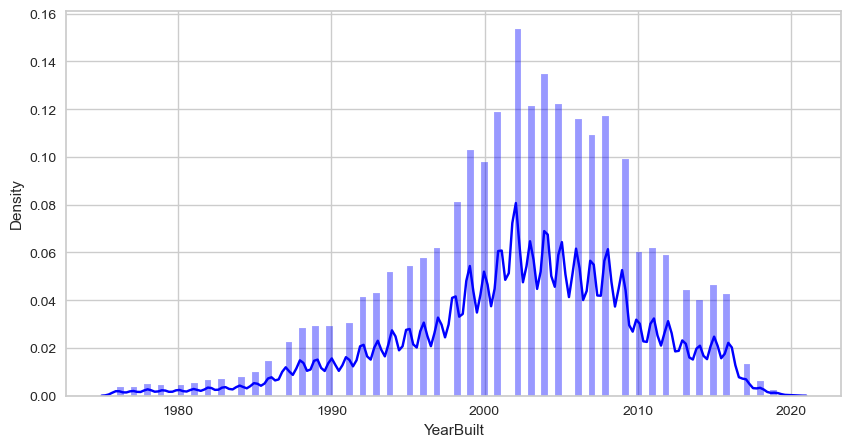

In [127]:
#Show the distribution of YearBuilt
plt.figure(figsize=(10,5))
sns.distplot(train_copy['YearBuilt'], color='blue', bins=100, hist_kws={'alpha': 0.4});
plt.show()

In [128]:
#eliminate values higher than 40 in MonthsLastRev column
train_copy = train_copy[train_copy['MonthsLastRev'] < 40]

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:xlabel='MonthsLastRev', ylabel='Density'>

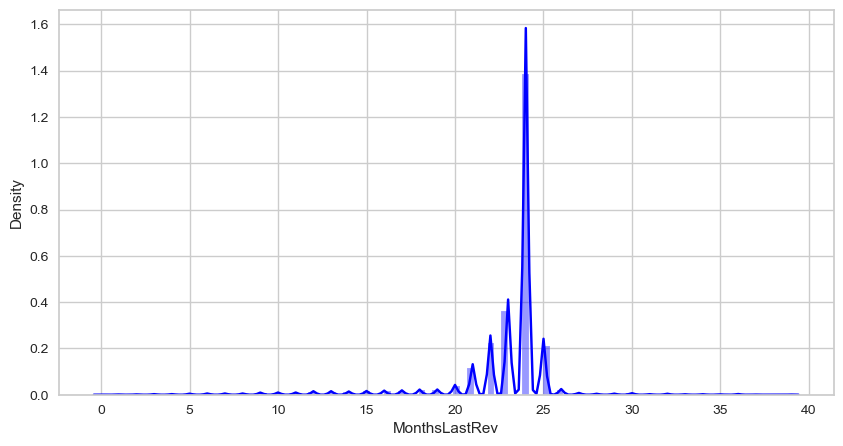

In [129]:
#show the distribution of MonthsLastRev
plt.figure(figsize=(10,5))
sns.distplot(train_copy['MonthsLastRev'], color='blue', bins=100, hist_kws={'alpha': 0.4});
plt.show()


In [130]:
# use describe function of monthslastrev column to see the distribution of values
train_copy['MonthsLastRev'].describe()


count   6063082.00
mean         22.97
std           3.10
min           0.00
25%          23.00
50%          24.00
75%          24.00
max          39.00
Name: MonthsLastRev, dtype: float64

In [131]:
#eliminate values higher than 400 in diameter column
train_copy = train_copy[train_copy['Diameter'] < 400]

In [132]:
#show the distribution of Diameter
plt.figure(figsize=(10,5))
sns.distplot(train_copy['Diameter'], color='blue', bins=100, hist_kws={'alpha': 0.4});
plt.show()


<Figure size 1000x500 with 0 Axes>

In [ ]:
train_copy.shape

(6055833, 53)

<AxesSubplot:>

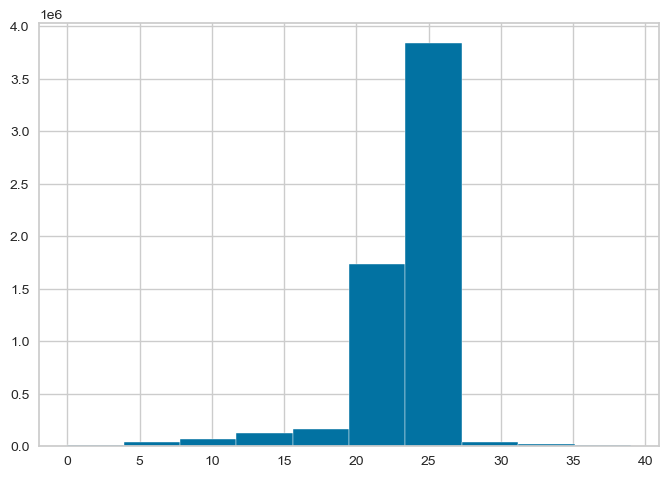

In [ ]:
#graph histogram of MonthsLastRev column
train_copy['MonthsLastRev'].hist()

In [ ]:
#plot column Length
train_copy['Length'].value_counts()

2.00      26460
1.00      25265
0.50      18346
1.00      18204
1.50      17921
          ...  
145.53        1
159.73        1
163.42        1
188.85        1
243.87        1
Name: Length, Length: 203962, dtype: int64

<AxesSubplot:>

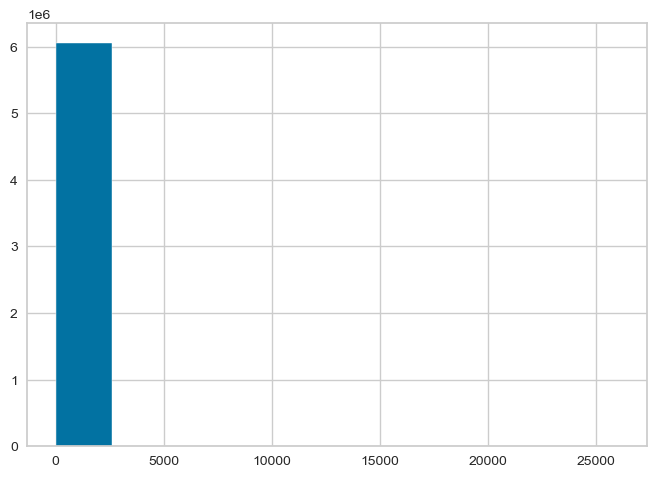

In [ ]:
#plot histogram of Length column
train_copy['Length'].hist()

In [ ]:
train_copy.columns

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Incidence', 'Province', 'Town', 'YearBuilt',
       'Diameter', 'Length', 'Pressure', 'NumConnections',
       'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Previous_Incidences', 'average_severity_pipe', 'relative_risk',
       'preventive_maintenance_rate', 'Probability_rate',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'Age_pipe_at_inspection', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'incidence_area',
       'connection_bool', 'Severity_high', 'Severity_medium', 'Severity_low',
       'No_Previous_Severity_Low', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_High', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Press

# Dropping section
Dropping will be done here

In [ ]:
#delete the rows with YearBuilt higher than InspectionYear
train_copy = train_copy.drop(train_copy[(train_copy['YearBuilt'] > train_copy['InspectionYear'])].index)

# Exporting the new dataset for a next notebook

In [ ]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data\Data cleaned")
#export the dataframe to a csv file
train_copy.to_csv('train_consolidated.csv', index=False)

# Plotting EDA for new dataset

In [ ]:
#pandas profiling on the train_copy dataframe
profile = ProfileReport(train_copy, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# The Archive Section
Just in case we regret....
NOT DELETED JUST IN CASE NEEDED, HIGHLY CONFIDENT WE DONT NEED THESE


#aggregate the number of Age_pipe_inspection in a new column
train_copy['Aggregate_pipe_age_inspection'] = train_copy.groupby('PipeId')['Age_pipe_inspection'].transform('sum')
#place column in 10th position
cols = list(train_copy.columns.values)
cols.pop(cols.index('Aggregate_pipe_age_inspection'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 'Average_MonthsLastRev',
    'Age_pipe_inspection', 'Aggregate_pipe_age_inspection', 'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
train_copy.head(10)


#divide the Aggregate_pipe_age_inspection by the count of Incidence when is 1 and create new column with the average_age_pipe_inspection_when_incidence saving it in 10th position
train_copy['average_age_pipe_inspection_when_incidence'] = train_copy['Aggregate_pipe_age_inspection'] / train_copy.groupby('PipeId')['Incidence'].transform('count')
#place column in 10th position
cols = list(train_copy.columns.values)
cols.pop(cols.index('average_age_pipe_inspection_when_incidence'))
train_copy = train_copy[['PipeId', 'MaintenanceId', 'Inspections', 'Probability_incidence', 'Risk_S*I/Inspections', 'Average_MonthsLastRev',
    'Age_pipe_inspection', 'Aggregate_pipe_age_inspection', 'average_age_pipe_inspection_when_incidence', 'No_Incidents', 'Risk_S*I', 'average_severity', 'MonthsLastRev', 'Severity', 'Incidence', 'Province',
    'Town','YearBuilt', 'InspectionYear', 'InspectionDate','Material', 'GasType', 'Diameter', 'Length', 'Pressure',
    'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
#head of rows only where average_age_pipe_inspection_when_incidence when Incidence is 0
train_copy[train_copy['Incidence'] == 0].head(10)

#take PipeId column from df_submission dataframe and match it with PipeId column in train_copy dataframe to split train_copy into df_combined_train and df_combined_test. The test split should be the one with the higher number of rows
df_combined_test = train_copy[train_copy['PipeId'].isin(df_submission['PipeId'])]
df_combined_train = train_copy[~train_copy['PipeId'].isin(df_submission['PipeId'])]
#Do not look back at the test set until you are ready to submit your predictions


#take PipeId column from df_submission dataframe and match it with PipeId column in train_copy dataframe to split train_copy into df_combined_train and df_combined_test. The test split should be the one with the higher number of rows
df_combined_trained = train_copy[train_copy['PipeId'].isin(df_submission['PipeId'])]
df_combined_test = train_copy[~train_copy['PipeId'].isin(df_submission['PipeId'])]

#normalize df_combined_train_sub dataframe but the booleans
df_combined_train_sub_norm = df_combined_train_sub.copy()
df_combined_train_sub_norm[['Inspections', 'No_Incidents', 'Risk_S*I/Inspections', 'MonthsLastRev', 'Risk_S*I', 'Severity',
         'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder', 'TownCount']] = MinMaxScaler().fit_transform(df_combined_train_sub_norm[['Inspections', 'No_Incidents', 'Risk_S*I/Inspections', 'MonthsLastRev', 'Risk_S*I', 'Severity',
            'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder', 'TownCount']])
df_combined_train_sub_norm.head(2)

#Extract the day of the week from InspectionDate and place it in 5th position
train_copy['InspectionDay'] = train_copy['InspectionDate'].dt.day_name()
cols = list(train_copy.columns.values)
cols.pop(cols.index('InspectionDay'))
train_copy = train_copy[['PipeId', 'Inspections', 'No_Incidents', 'Risk_S*I/Inspections','leakage_estimate_factor','InspectionDay',
    'InspectionYear', 'InspectionDate', 'MonthsLastRev', 'Risk_S*I','Severity','Incidence', 'Province', 'Town', 'YearBuilt', 'Material', 'GasType',
    'Diameter', 'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'BoolBridle']]
train_copy.head(1)


#on the train_copy if YEarBuilt is equal to 2021 and InspectionYear is equal to NaN, fill the InspectionYear with 2021
#train_copy.loc[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'].isnull()), 'InspectionYear'] = 2021


#do a range in the train_copy for the YearBuilt column if the value is greater than 2020 and the InspectionYear is equal to Nan, change the value of InspectionYear to YearBuilt

for i in train_copy['YearBuilt']:
    if i > 2020:
        train_copy.loc[(train_copy['YearBuilt'] > 2020) & (train_copy['InspectionYear'].isnull()), 'InspectionYear'] = i